In [1]:
# Import libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time as systime
import datetime as dtime
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import gc
import seaborn as sns
%matplotlib inline

In [2]:
# Import test and train files

TRAIN_FILENAME = 'train.csv'
TEST_FILENAME = 'test.csv'

traindf = pd.read_csv('../sf crime classification/'+TRAIN_FILENAME, parse_dates=['Dates'], index_col=False)
testdf = pd.read_csv('../sf crime classification/'+TEST_FILENAME, parse_dates=['Dates'], index_col=False)

# Exploratory Data Analysis

In this section I will do exploratory data analysis for the features

In [3]:
traindf.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [5]:
traindf.info()
print('------------------------')
testdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null datetime64[ns]
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 67.0+ MB
------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 884262 entries, 0 to 884261
Data columns (total 7 columns):
Id            884262 non-null int64
Dates         884262 non-null datetime64[ns]
DayOfWeek     884262 non-null object
PdDistrict    884262 non-null object
Address       884262 non-null object
X             884262 non-null float64
Y             884262 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage:

In [6]:
traindf.Category.value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

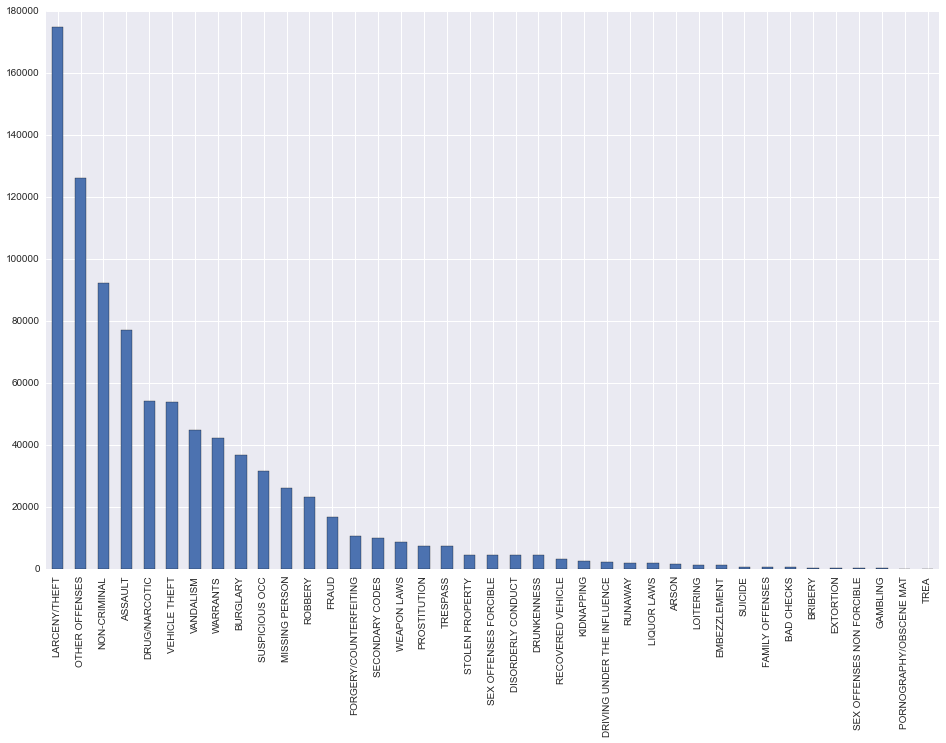

In [7]:
plt.figure(figsize=(16,10))
traindf.Category.value_counts().plot(kind='bar')

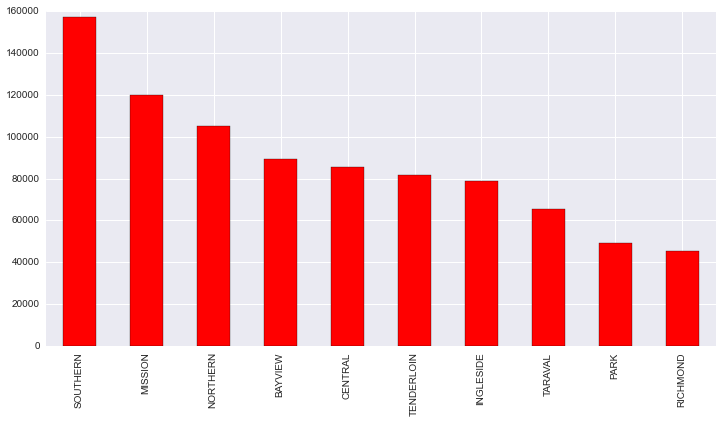

In [8]:
plt.figure(figsize=(12,6))
traindf.PdDistrict.value_counts().plot(kind='bar', color='red')

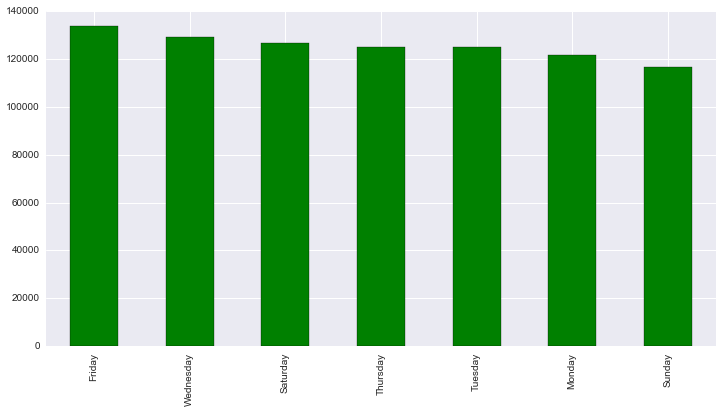

In [9]:
plt.figure(figsize=(12,6))
traindf.DayOfWeek.value_counts().plot(kind='bar', color='green')

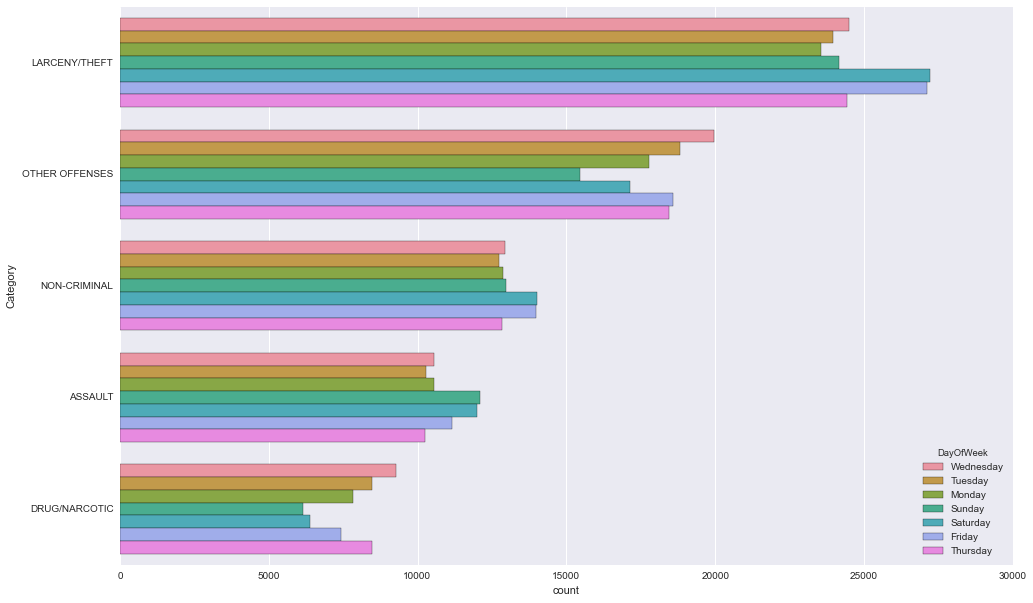

In [10]:
fig, ax = plt.subplots(figsize=(16,10))
sns.countplot( y="Category", hue="DayOfWeek", data=traindf, order=traindf.Category.value_counts().iloc[:5].index)

In [11]:
traindf.PdDistrict.value_counts()

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
dtype: int64

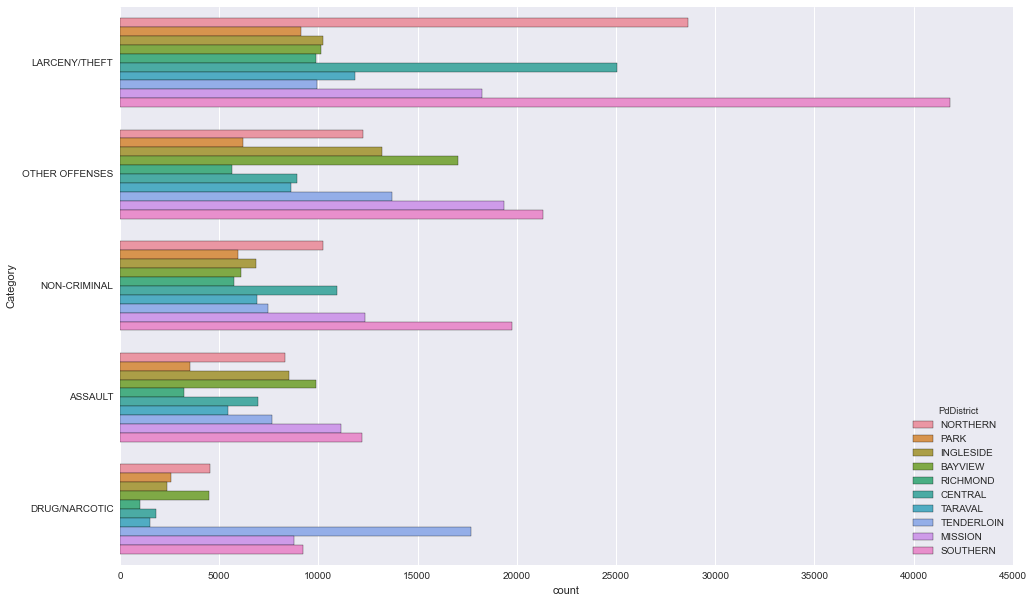

In [12]:
fig, ax = plt.subplots(figsize=(16,10))
sns.countplot( y="Category", hue="PdDistrict", data=traindf, order=traindf.Category.value_counts().iloc[:5].index)

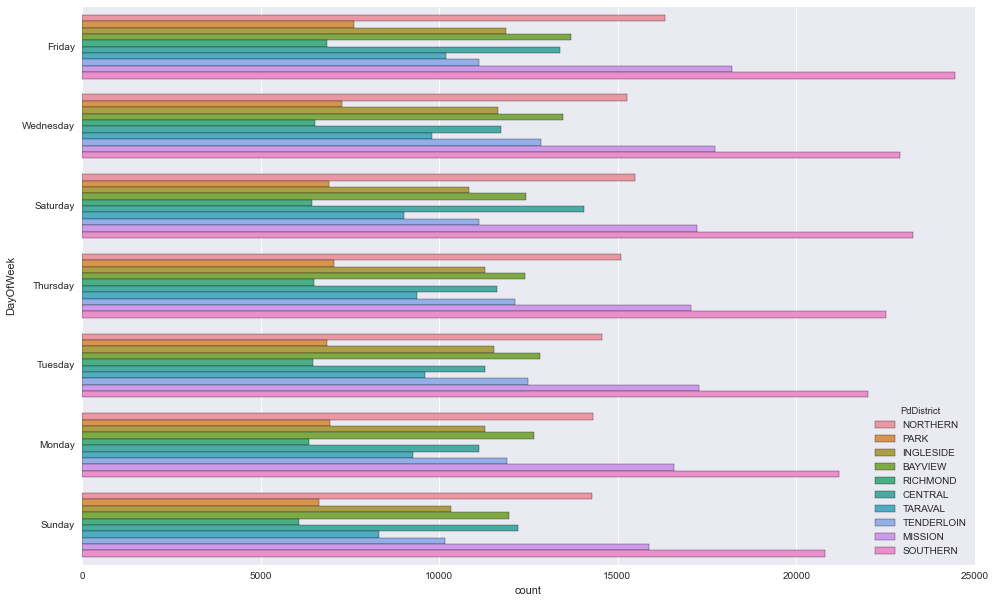

In [13]:
fig, ax = plt.subplots(figsize=(16,10))
sns.countplot( y="DayOfWeek", hue="PdDistrict", data=traindf, order=traindf.DayOfWeek.value_counts().iloc[:7].index)

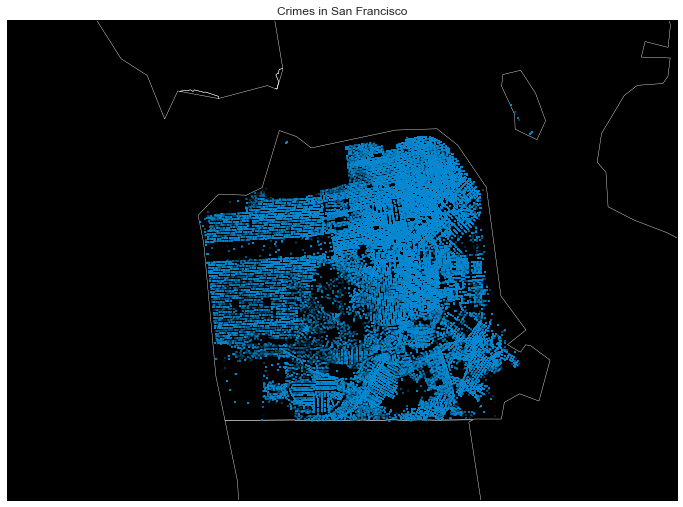

In [14]:
# Plotting crimes in San Francisco

import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.basemap import Basemap

lon_min, lon_max = -122.6, -122.3
lat_min, lat_max = 37.68, 37.85

sf_crimes = (traindf["X"]>lon_min) &\
              (traindf["X"]<lon_max) &\
              (traindf["Y"]>lat_min) &\
              (traindf["Y"]<lat_max)

sf_crimes_traindf = traindf[sf_crimes]

# Mercator of SF
plt.figure(3, figsize=(12,10))

m3 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='c')

m3.fillcontinents(color='#191919',lake_color='white') # dark grey land, black lakes
m3.drawmapboundary(fill_color='#000000')                # black background
m3.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders
m3.drawcounties(linewidth=0.4, color="w")               # county border for SF

# Plot the data
mxy = m3(sf_crimes_traindf["X"].tolist(), sf_crimes_traindf["Y"].tolist())
m3.scatter(mxy[0], mxy[1], s=5, c="#1292db", lw=0, alpha=0.1, zorder=5)

plt.title("Crimes in San Francisco")
plt.show()

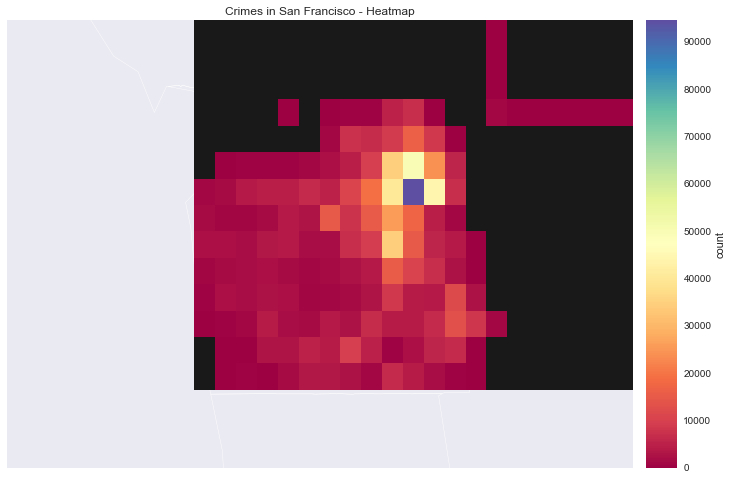

In [15]:
# Heatmap

import os
from matplotlib.colors import LinearSegmentedColormap

traindf["lon_round"] = traindf["X"].round(decimals=2)
traindf["lat_round"] = traindf["Y"].round(decimals=2)

df_cnt = pd.pivot_table(traindf,\
                        values="Category",\
                        index="lon_round",\
                        columns="lat_round",\
                        aggfunc="count")

plt.figure(4, figsize=(12,10))
m5b = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='c') 
m3.drawcounties(linewidth=0.4, color="w")
# Construct a heatmap 
lons = df_cnt.index.values
lats = df_cnt.columns.values
x, y = np.meshgrid(lons, lats) 
px, py = m5b(x, y) 

data_values = df_cnt.values
masked_data = np.ma.masked_invalid(data_values.T)
cmap = plt.cm.Spectral
cmap.set_bad(color="#191919")
# Plot the heatmap
m5b.pcolormesh(px, py, masked_data, cmap=cmap, zorder=5)
m5b.colorbar().set_label("count")
plt.title("Crimes in San Francisco - Heatmap")

plt.show()

# Data Preprocessing and Feature Engineering

In [16]:
# Cleaning X,Y columns in training and test set
# Training set
scaler=preprocessing.StandardScaler()
scaler.fit(traindf[["X","Y"]])
traindf[["X","Y"]]= scaler.transform(traindf[["X","Y"]])
traindf=traindf[abs(traindf["Y"])<100]
traindf.index=range(len(traindf))
# Test set - setting outliers to 0
testdf[["X","Y"]]=scaler.transform(testdf[["X","Y"]])
testdf["X"]=testdf["X"].apply(lambda x: 0 if abs(x)>5 else x)
testdf["Y"]=testdf["Y"].apply(lambda y: 0 if abs(y)>5 else y)

In [17]:
months={1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}

def feature_engineering(data):
    
    #Get binarized weekdays, districts, and hours. Get X,Y values
    days = pd.get_dummies(data.DayOfWeek)
    district = pd.get_dummies(data.PdDistrict)
    month = pd.get_dummies(data.Dates.dt.month.map(months))
    hour = data.Dates.dt.hour
    hour = pd.get_dummies(hour)  
    X = data.X
    Y = data.Y
    #Append newly created dummy variables to dataframe
    new_data = pd.concat([hour, month, days, district, X, Y ], axis=1)
    
    return new_data

In [18]:
train = feature_engineering(traindf)
test = feature_engineering(testdf)

In [19]:
# Converting categorical data in Category column to labels

cat_enc = LabelEncoder()
cat_enc.fit(traindf['Category'])
train['CategoryEncoded'] = cat_enc.transform(traindf['Category'])

In [20]:
feature_cols = list(train.columns[:-1])
target_col = train.columns[-1]
X_all = train[feature_cols]
y_all = train[target_col]

In [21]:
# Train/test split - 80% training, 20% validation set

from sklearn import cross_validation
from sklearn.cross_validation import StratifiedShuffleSplit

# the number of training points
num_train = 707410 #80% of data points

#the number of testing points
num_validation = X_all.shape[0] - num_train

sss = StratifiedShuffleSplit(y_all, n_iter=2, test_size=num_validation, random_state=40)
for train_index, valid_index in sss:
    print("TRAIN:", train_index, "VALIDATION:", valid_index)
    X_train = X_all.iloc[train_index]
    X_valid = X_all.iloc[valid_index]
    y_train = y_all[train_index]
    y_valid = y_all[valid_index]

len(sss)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Validation set has {} samples.".format(X_valid.shape[0])

('TRAIN:', array([584862, 620970, 687896, ..., 331644, 120617, 321146]), 'VALIDATION:', array([779555, 721991, 601663, ..., 797070, 638773,  89638]))
('TRAIN:', array([497123, 137455, 846834, ..., 442796, 665734, 795393]), 'VALIDATION:', array([447715, 249798,   8149, ..., 548468, 395195, 318840]))
Training set has 707409 samples.
Validation set has 170573 samples.


# Implementation

In [21]:
# Random Forest Classifier
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier

clf_A = RandomForestClassifier(max_depth=10, n_estimators=100)
clf_A.fit(X_train, y_train)
clf_probs = clf_A.predict_proba(X_valid)
score = log_loss(y_valid, clf_probs)
print score

2.54231670534


In [22]:
test_predicted_rf = clf_A.predict_proba(test[feature_cols])
result_rf = pd.DataFrame(test_predicted_rf, columns=cat_enc.classes_)
submission_rf = np.round(result_rf,4)
submission_rf.to_csv('sfcrime_rf.csv', index = True, index_label = 'Id')

In [23]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

clf_B = LogisticRegression(C=.001)
clf_B.fit(X_train,y_train)
clf_probs_logit = clf_B.predict_proba(X_valid)
score = log_loss(y_valid, clf_probs_logit)
print score

2.65954860416


In [24]:
test_predicted_logit = clf_B.predict_proba(test[feature_cols])
result_logit = pd.DataFrame(test_predicted_logit, columns=cat_enc.classes_)
submission_logit = np.round(result_logit,4)
submission_logit.to_csv('sfcrime_logit.csv', index = True, index_label = 'Id')

In [25]:
# Naive-Bayes
from sklearn.naive_bayes import BernoulliNB
clf_D = BernoulliNB()
clf_D.fit(X_train,y_train)
clf_probs_nb = clf_D.predict_proba(X_valid)
score = log_loss(y_valid, clf_probs_nb)
print score

2.60790598908


In [26]:
test_predicted_nb = clf_D.predict_proba(test[feature_cols])
result_nb = pd.DataFrame(test_predicted_nb, columns=cat_enc.classes_)
submission_nb = np.round(result_nb,4)
submission_nb.to_csv('sfcrime_nb.csv', index = True, index_label = 'Id')

In [40]:
# XGBoost
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import log_loss

clf_C = xgb.XGBClassifier(max_depth=8, n_estimators=12, learning_rate=0.6)
clf_C.fit(X_train,y_train)
clf_probs_xgb = clf_C.predict_proba(X_valid)
score = log_loss(y_valid, clf_probs_xgb)
print score

2.47890683928


In [38]:
param_test = {'max_depth':range(4,10,1)}
gsearch = GridSearchCV(estimator = xgb.XGBClassifier(learning_rate=0.6, n_estimators=12),
param_grid = param_test, scoring='log_loss',n_jobs=4,iid=False, cv=2)
gsearch.fit(X_train,y_train)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

([mean: -2.49606, std: 0.00038, params: {'max_depth': 4},
  mean: -2.48313, std: 0.00059, params: {'max_depth': 5},
  mean: -2.47353, std: 0.00329, params: {'max_depth': 6},
  mean: -2.50796, std: 0.02397, params: {'max_depth': 7},
  mean: -2.48557, std: 0.02545, params: {'max_depth': 8},
  mean: -2.47923, std: 0.00609, params: {'max_depth': 9}],
 {'max_depth': 6},
 -2.473532421269641)

In [28]:
test_predicted_xgb = clf_C.predict_proba(test[feature_cols])
result_xgb = pd.DataFrame(test_predicted_xgb, columns=cat_enc.classes_)
submission_xgb = np.round(result_xgb,4)
submission_xgb.to_csv('sfcrime_xgb.csv', index = True, index_label = 'Id')

In [29]:
# Confusion matrix

class_names=cat_enc.classes_

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", size=1)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[   1   37    0 ...,   18    0    0]
 [   1 1815    0 ...,  511   56    9]
 [   0    0    0 ...,    2    1    0]
 ..., 
 [   3  513    0 ..., 1258   13    3]
 [   0  392    0 ...,  125   59    2]
 [   0  195    0 ...,   54    8    6]]
Normalized confusion matrix
[[  3.40136054e-03   1.25850340e-01   0.00000000e+00 ...,   6.12244898e-02
    0.00000000e+00   0.00000000e+00]
 [  6.69612964e-05   1.21534753e-01   0.00000000e+00 ...,   3.42172224e-02
    3.74983260e-03   6.02651667e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   2.53164557e-02
    1.26582278e-02   0.00000000e+00]
 ..., 
 [  2.87163779e-04   4.91050062e-02   0.00000000e+00 ...,   1.20417345e-01
    1.24437638e-03   2.87163779e-04]
 [  0.00000000e+00   4.78048780e-02   0.00000000e+00 ...,   1.52439024e-02
    7.19512195e-03   2.43902439e-04]
 [  0.00000000e+00   1.17328520e-01   0.00000000e+00 ...,   3.24909747e-02
    4.81347774e-03   3.61010830e-03]]


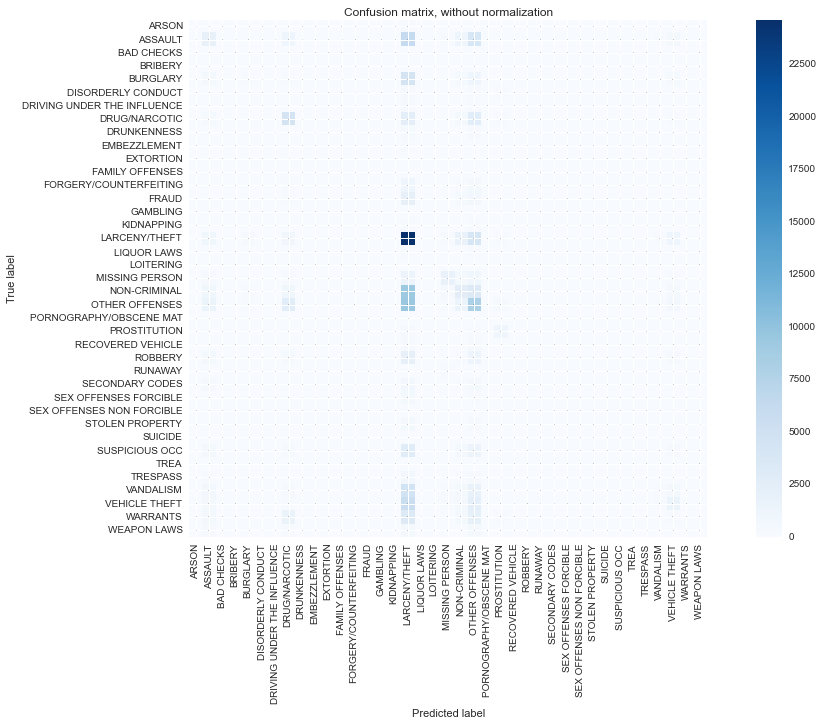

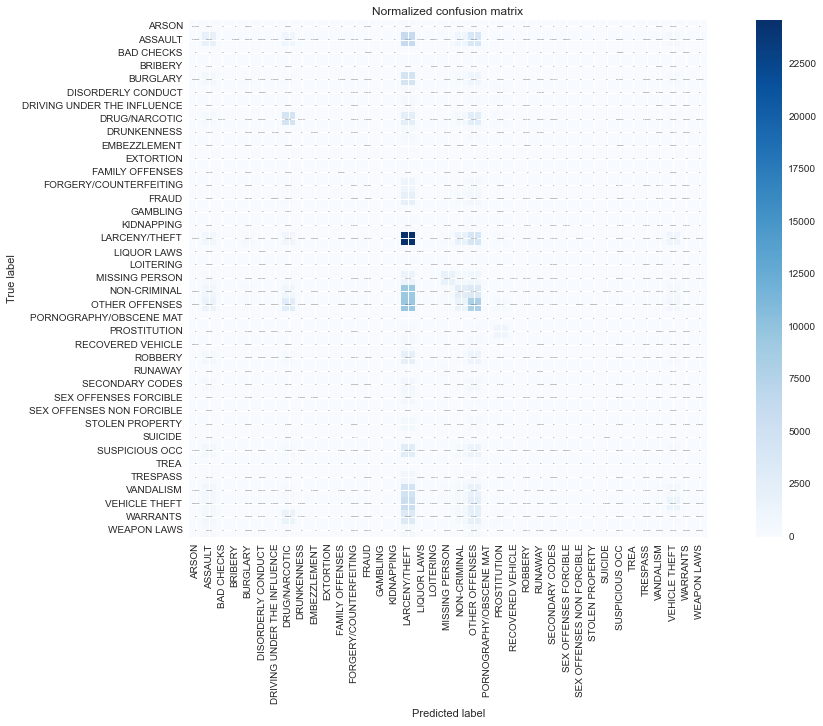

In [34]:
import itertools
import seaborn as sns
from sklearn.metrics import confusion_matrix

pred = clf_C.predict(X_valid) #Prediction based on XGBoost
cnf_matrix = confusion_matrix(y_valid, pred)
#np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (15,10))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize = (15,10))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()